In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=sns.load_dataset('iris')

In [39]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

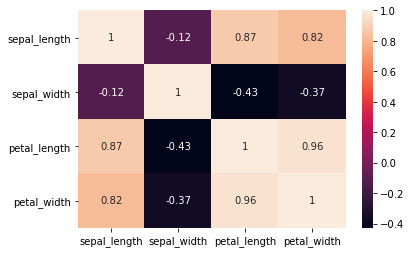

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [44]:
df.species=df.species.map({'setosa':0,'versicolor':1,'virginica':2})

In [45]:
df.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

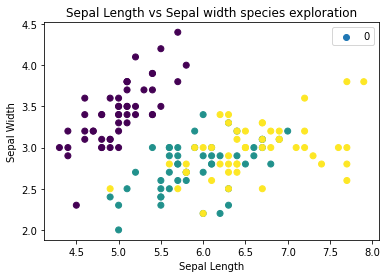

In [56]:
plt.scatter(df.sepal_length,df.sepal_width,c=df.species)
plt.title("Sepal Length vs Sepal width species exploration")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(labels=df.species,loc='best')

In [59]:
X=df.iloc[:,:2]
y=df.iloc[:,-1]

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)


In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
logit_reg=LogisticRegression()
logit_reg.fit(xtrain,ytrain)
ypred=logit_reg.predict(xtest)

<AxesSubplot:>

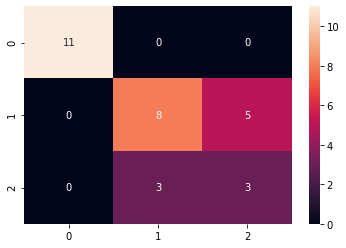

In [66]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [67]:
xtr=sc.inverse_transform(xtrain)
xte=sc.inverse_transform(xtest)

In [74]:
xmin,xmax=xtr[:,0].min(),xtr[:,0].max()
ymin,ymax=xtr[:,1].min(),xtr[:,1].max()


In [108]:
xgrid=np.arange(xmin-.5,xmax+.5,0.01)
ygrid=np.arange(ymin-.5,ymax+.5,0.01)

In [109]:
xx,yy=np.meshgrid(xgrid,ygrid)

In [110]:
xx.shape,yy.shape

((341, 461), (341, 461))

In [111]:
z=logit_reg.predict(sc.transform(np.c_[xx.ravel(),yy.ravel()]))

In [112]:
Z=z.reshape(xx.shape)

In [113]:
Z.shape

(341, 461)

Text(0, 0.5, 'Sepal Width')

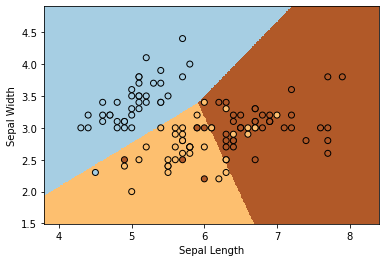

In [137]:
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired,shading='auto')
plt.scatter(xtr[:,0],xtr[:,1],c=ytrain,cmap=plt.cm.Paired,edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')



Text(0, 0.5, 'Sepal Width')

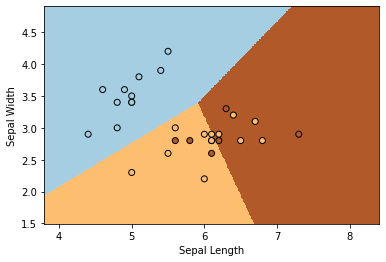

In [138]:
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired,shading='auto')
plt.scatter(xte[:,0],xte[:,1],c=ytest,cmap=plt.cm.Paired,edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

